<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/18_3_%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Введение в сверточные нейронные сети](https://colab.research.google.com/drive/10cBnEfHhZlv3ZhEgVimA3GqSEZtvqpTv)
2. [Обучение сверточной нейронной сети на ограниченном наборе данных](https://colab.research.google.com/drive/1e1aZ9K1vQIujPf1mzmta5xtbfNqJ_ai-)
3. Предобученные сверточные НС
4. [Домашняя работа](https://colab.research.google.com/drive/18saeNkboTBS_5E9lxJ6xB4R0pawgxruY)

## Перенос обучения

Представьте себе, что вы решили научиться играть на укулеле. Без музыкального
образования и без владения другими инструментами потребуется несколько
месяцев обучения. Но если у вас есть навыки игры на другом инструменте,
например на гитаре, то хватит и нескольких дней. В реальной жизни мы
часто используем опыт, полученный при решении одной задачи, для решения
другой. Чем более схожи две задачи, тем легче адаптировать имеющийся опыт.

Справедливо это и для глубокого обучения. Проект глубокого обучения можно
относительно быстро реализовать, если взять предварительно обученную модель, которая использует знания, полученные во время обучения, и адаптирует
их к поставленной задаче. Это называется **переносом обучения**.

Представьте, что нам нужно обнаружить человеческое лицо. Для классификации изображений и обнаружения лиц мы могли бы использовать сверточную сеть. Такая сеть будет состоять из нескольких слоев, связанных друг с другом.
Эти слои представляют математические операции. Выход одного слоя является
входом для следующего. Первый (или самый нижний) слой — это входной слой,
в который вводится изображение. Последний (или самый верхний) слой — это
выходной слой, который дает прогнозы.

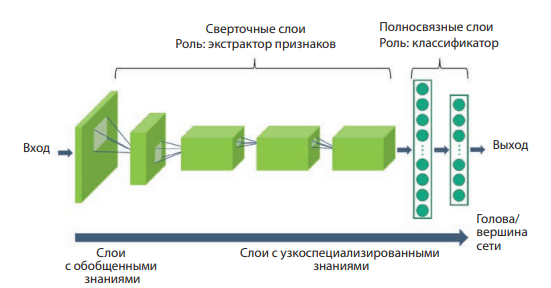

**Рис. 1. Общий вид сверточной нейронной сети**

Слои нижнего уровня (ближе к входу) активируются наиболее простыми
формами, например краями и кривыми. Поскольку эти слои активируются
только простыми формами, их можно повторно использовать для других целей,
отличных от распознавания лиц, например для распознавания автомобилей. Слои среднего уровня активируются более сложными формами, такими как глаза,
нос и губы. Эти слои более специализированные, чем слои нижнего уровня.
Они могут быть не так полезны для распознавания автомобилей, зато могут пригодиться для распознавания животных. А слои на самом высоком уровне  активируются еще более сложными формами — например, большими фрагментами человеческого лица. Эти слои часто узко специализированы для конкретных задач и, следовательно, наименее пригодны для повторного использования при решении других задач классификации изображений.

Чтобы перенести знания из одной модели в другую, нужно повторно использовать больше универсальных слоев (расположенных ближе к входу) и меньше специализированных для конкретных задач (расположенных ближе к выходу).
Иначе говоря, нужно удалить несколько последних слоев (обычно удаляются
все полносвязные слои), оставить только наиболее универсальные и добавить
слои, предназначенные для нашей конкретной задачи классификации. После
начала обучения универсальные слои (составляющие большую часть новой
модели) останутся замороженными (то есть их нельзя будет изменить), а вновь
добавленные слои для конкретных задач будут доступны для изменения. Благодаря такому подходу прием переноса обучения помогает быстро обучать новые
модели. На рис. 2 показан такой процесс создания модели для решения задачи Y на основе модели, предварительно обученной для задачи X.

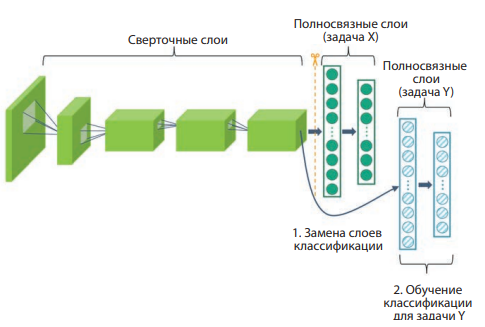

**Рис. 2. Общая схема переноса обучения**

### Приемы переноса обучения

Типичным и эффективным подходом к глубокому обучению на небольших наборах изображений является использование предварительно обученной сети.

**Предварительно обученная сеть** — это сохраненная сеть, прежде обученная на
большом наборе данных, обычно в рамках масштабной задачи классификации
изображений.

Если этот исходный набор данных достаточно велик и достаточно обобщен, тогда пространственная иерархия признаков, изученных сетью, может эффективно выступать в роли обобщенной модели видимого мира и быть полезной во многих разных задачах распознавания образов, даже если эти новые задачи будут связаны с совершенно иными классами, отличными от классов в оригинальной задаче.

Другими словами, можно обучить сеть на изображениях из ImageNet (где подавляющее большинство классов — животные и бытовые предметы) и затем использовать эту обученную сеть для идентификации чего-то иного, например предметов мебели на изображениях. Такая переносимость изученных признаков между разными задачами — главное преимущество глубокого обучения перед многими более старыми приемами поверхностного обучения, которое делает глубокое обучение очень эффективным инструментом для решения задач с малым объемом данных.

В нашем случае мы возьмем за основу сверточную нейронную сеть, обученную на
наборе `ImageNet` (1,4 миллиона изображений, классифицированных на 1000 разных классов). Коллекция ImageNet содержит множество изображений разных
животных, включая разновидности кошек и собак, а значит, можно рассчитывать,
что модель, обученная на этой коллекции, прекрасно справится с нашей задачей
классификации изображений кошек и собак.

Мы воспользуемся архитектурой `VGG16`, разработанной Кареном Симоняном (Karen Simonyan) и Эндрю Циссерманом (Andrew Zisserman) в 2014-м (https://arxiv.org/abs/1409.1556). Это простая
и широко используемая архитектура сверточной нейронной сети для обучения на
коллекции ImageNet. И она не единственная! Существует множество других моделей, обученных на ImageNet — VGG, ResNet, Inception, Inception-ResNet, Xception и т. д.

Возникает вопрос: а как же их использовать?

Можно выделить два приема использования предварительно обученных сетей: выделение признаков (feature extraction) и тонкая настройка (fine-tuning). Мы рассмотрим оба и начнем с выделения признаков.

#### Выделение признаков

Выделение признаков заключается в использовании представлений, изученных
предыдущей сетью, для выделения признаков из новых образцов, которые затем
пропускаются через новый классификатор, обучаемый с нуля.

Сверточные нейронные сети, используемые для классификации изображений, состоят из двух частей: они начинаются с последовательности слоев свертки и субдискретизации, а заканчиваются полносвязным классификатором.

> Напомним, тем кто забыл, что **субдискретизация** - это "официальное" название того, что делает слой MaxPooling2D. Этот термин имеет долгую и богатую историю, причём хронологически оно впервые появилось в телевидении. При переходе от чёрно-белого к цветному вещанию перед инженерами встала задача передачи значительно большего количества информации в пределах той же или почти той же полосы пропускания. Субдискретизация сигнала цветности – это тип сжатия, который уменьшает информацию о цвете в видеосигнале в пользу данных о яркости. Она уменьшает требуемую пропускную способность канала передачи (а значит, и максимальный битрейт) без существенного влияния на качество изображения.
И всё это основывается на чувствительности человеческого зрения к изменениям цвета. Именно поэтому MaxPooling2D так широко используется в нейронных сетях, так как имеет четкую физическую интерпретацию. С этой точки зрения AveragePooling2D введен как альтернатива, без привязки к особенностям зрения, поэтому к нему у многих скептическое отношение.


Первая часть называется сверточной основой (convolutional base) модели. В случае со сверточными нейронными сетями процесс выделения признаков заключается в том, чтобы взять сверточную основу предварительно обученной сети, пропустить через нее новые данные и на основе вывода обучить новый классификатор.

Почему повторно используется только сверточная основа? Нельзя ли повторно использовать полносвязный классификатор? В общем случае этого следует избегать.

Причина в том, что представления, полученные сверточной основой, обычно более универсальны, а значит, более пригодны для повторного использования. Карты
признаков сверточной нейронной сети — это карты присутствия на изображениях обобщенных понятий, которые могут пригодиться независимо от конкретной
задачи распознавания образов.

Однако представления, изученные классификатором, обязательно будут характерны для набора классов, на котором обучалась модель. Они будут содержать только информацию о вероятности присутствия того или иного класса на изображении.

Кроме того, представления, присутствующие в полносвязных слоях, не содержат никакой информации о местоположении объекта на исходном изображении (эти слои лишены понятия пространства), тогда как сверточные карты признаков все еще хранят ее.

Для задач, где местоположение объектов имеет значение, полносвязные признаки почти бесполезны!

Отметим также, что уровень обобщенности (и, соответственно, пригодности к повторному использованию) представлений, выделенных конкретными сверточными слоями, зависит от глубины слоя в модели. Слои, следующие первыми, выделяют локальные, наиболее обобщенные карты признаков (таких, как визуальные границы, цвет и текстура), тогда как слои, располагающиеся дальше (или выше), выделяют более абстрактные понятия (такие, как «глаз кошки» или «глаз собаки»).

А теперь перейдем к практике и используем сверточную основу сети VGG16, обученной на данных ImageNet, для выделения полезных признаков из изображений кошек и собак, а затем обучим классификатор кошек и собак, опираясь на эти признаки.

Модель VGG16 входит в состав фреймворка Keras. Ее можно импортировать
из модуля keras.applications. Вот список моделей классификации изображений (все они предварительно обучены на наборе ImageNet), доступных в keras.applications:
* Xception
* Inception V3
* ResNet50
* VGG16
* VGG19
* MobileNet


Создадим экземпляр модели VGG16.

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Здесь конструктору передаются три аргумента:
* Аргумент `weights` определяет источник весов для инициализации модели.
* Аргумент `include_top` определяет необходимость подключения к сети полносвязного классификатора. По умолчанию этот полносвязный классификатор
соответствует 1000 классов из `ImageNet`. Так как мы планировали использовать
свой полносвязный классификатор (только с двумя классами: cat и dog), мы не
будем подключать его.
* Аргумент `input_shape` определяет форму тензоров с изображениями, которые
будут подаваться на вход сети. Это необязательный аргумент: если опустить его,
сеть сможет обрабатывать изображения любого размера.

Далее приводится информация о сверточной основе VGG16. Она напоминает простые сверточные нейронные сети, уже знакомые вам:

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Заключительная карта признаков имеет форму $(4, 4, 512)$. Поверх нее мы и приделаем полносвязный классификатор.

Далее можно пойти двумя путями:
* Пропустить наш набор данных через сверточную основу, записать получившийся массив Numpy на диск и затем использовать его как входные данные для отдельного, полносвязного классификатора. Это быстрое и незатратное решение, потому что требует запускать сверточную основу только один раз для каждого входного изображения, а сверточная основа — самая дорогостоящая часть конвейера. Однако по той же причине этот прием не позволит использовать прием расширения данных.
* Дополнить имеющуюся модель `conv_base` слоями `Dense` и пропустить все входные данные. Этот путь позволяет использовать расширение данных, потому что каждое изображение проходит через сверточную основу каждый раз, когда попадает в модель. Однако по той же причине этот путь намного более затратный, чем первый.

Мы охватим оба приема.

##### Быстрое выделение признаков без расширения данных

Начнем с первого приема. Нам необходимо записать вывод `conv_base` на наших данных и использование его в роли входных данных новой модели.

Здесь нам необходимо выполнить часть кода из предыдущего Блокнота, а именно загрузить архив с набором данных "Кошки и Собаки" и создать новый датасет со структурой папок, подходящей для автоматической загрузки генератором изображений.

Поэтому код приводим в свернутом виде и без лишних комментариев, так как он нам уже знаком.

Не забудьте выполнить свернутый код ниже, прежде чем переходить к выделению признаков.

In [ ]:
# @title Загрузка набора данных и обучение модели

!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "cat-and-dog" -d ./temp

import os

# Набор утилит для работы с файловой системой
import shutil
from keras import layers # импортируем слои
from keras import models # импортируем модели
from keras import optimizers  # импортируем функции оптимизации
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'

# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)


for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    # Создаем обучающую выборку для заданного класса из диапазона (0-1000)
    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 1000)
    # Создаем проверочную выборку для заданного класса из диапазона (1000-1500)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 1000, 1500)
    # Создаем тестовую выборку для заданного класса из диапазона (1500-2000)
    create_dataset(IMAGE_PATH, test_dir, class_name, 1500, 2000)

--2024-09-05 12:42:28--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip.4’

cat-and-dog.zip.4   100%[===================>] 217.52M  14.5MB/s    in 18s     

2024-09-05 12:42:47 (12.4 MB/s) - ‘cat-and-dog.zip.4’ saved [228082266/228082266]



Сначала запустим экземпляры представленного ранее класса `ImageDataGenerator`,
чтобы извлечь изображения и их метки в массивы Numpy. Затем выделим признаки
из этих изображений путем вызова метода `predict` модели `conv_base`.

Если посмотреть на последний слой модели `conv_base`:

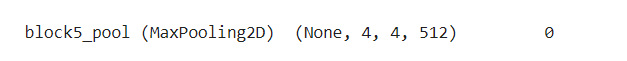

то видно, что размерность выходного слоя будет равен $(образцы, 4, 4, 512)$. Поэтому такой же размерности нам надо "извлекать признаки".

In [ ]:
import os                                                 # Для работы с файловой системой
import numpy as np                                        # Работа с матрицами
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Импортируем генератор изображений

datagen = ImageDataGenerator(rescale=1./255) # Задаем генератор и нормализуем данные делением на 255
batch_size = 20 # Размер батча (20 изображений)


# Функция извлечения признаков
def extract_features(directory, sample_count):
    # определяем размерность признаков, заполняем нулями
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    # определяем размерность выходных меток, заполняем нулями
    labels = np.zeros(shape=(sample_count))

    # генерируем данные из папки
    generator = datagen.flow_from_directory(
        directory,                # путь к папке
        target_size=(150, 150),   # изменить картинки до размера 150 х 150
        batch_size=batch_size,    # размер пакета
        class_mode='binary'       # задача бинарной классификации
    )
    i = 0
    for inputs_batch, labels_batch in generator: # в цикле пошагово генерируем пакет с картинками и пакет из меток
        features_batch = conv_base.predict(inputs_batch, verbose=0) # делаем предсказание на сгенерируемом пакете
        features[i * batch_size : (i + 1) * batch_size] = features_batch # складываем пакеты с признаками пачками в массив с признаками

        labels[i * batch_size : (i + 1) * batch_size] = labels_batch     # складываем пакеты с метками в массив с метками
        i += 1

        if i * batch_size >= sample_count: # Прерываем генерацию, когда выходим за число желаемых примеров
            break

    return features, labels # возвращаем кортеж (признаки, метки)

# Извлекаем (признаки, метки) для обучающей выборки, 2000 образцов
train_features, train_labels = extract_features(train_dir, 2000)

# Извлекаем (признаки, метки) для проверочной выборки, 1000 образцов
validation_features, validation_labels = extract_features(validation_dir, 1000)

# Извлекаем (признаки, метки) для тестовой выборки, 1000 образцов
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


В настоящий момент выделенные признаки имеют форму $(образцы, 4, 4, 512)$. Мы будем передавать их на вход полносвязного классификатора, поэтому мы должны привести этот тензор к форме $(образцы, 8192)$:


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))              # приводим к форме (образцы, 8192) обучающие признаки
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))    # приводим к форме (образцы, 8192) проверочные признаки
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))                # приводим к форме (образцы, 8192) тестовые признаки

Теперь можно определить свой полносвязный классификатор и обучить его на только что записанных данных и метках.

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

# Обратите внимание на размерность входа
model.add(layers.Input(shape=(4 * 4 * 512,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5)) # Добавим прореживание для борьбы с переобучением
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['acc']
)

# Обучаем модель на извлеченных признаках
history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6150 - loss: 0.6636 - val_acc: 0.8260 - val_loss: 0.4633
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7818 - loss: 0.4706 - val_acc: 0.8580 - val_loss: 0.3784
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8383 - loss: 0.3820 - val_acc: 0.8630 - val_loss: 0.3420
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8460 - loss: 0.3498 - val_acc: 0.8700 - val_loss: 0.3256
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8839 - loss: 0.2966 - val_acc: 0.8660 - val_loss: 0.3086
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8837 - loss: 0.2891 - val_acc: 0.8690 - val_loss: 0.2991
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8868 - loss: 0.2711 - val_acc: 0.8760 - val_loss: 0.2919
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8962 - loss: 0.2501 - val_acc: 0.8850 - val_loss: 0.2919
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

Обучение проходит очень быстро, потому что мы определили только два слоя Dense, — одна эпоха длится меньше одной секунды даже при выполнении на CPU.
Посмотрим теперь на графики изменения потерь и точности в процессе обучения.

In [ ]:
import matplotlib.pyplot as plt

# Рисуем графики
def show_history(store):
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
    plt.title('График точности на проверочной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'bo', label='Потери на проверочной выборке')
    plt.title('График потерь на проверочной и обучающей выборках')
    plt.legend()
    plt.show()

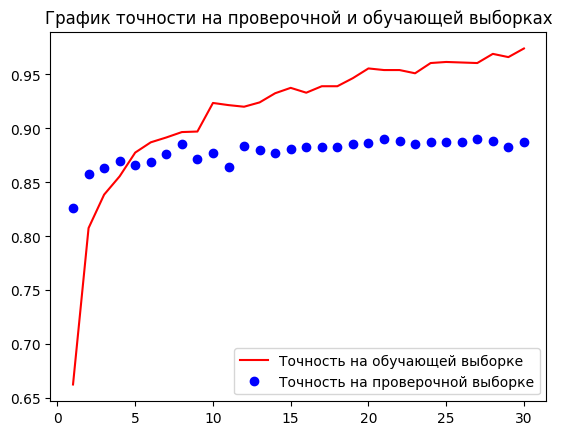

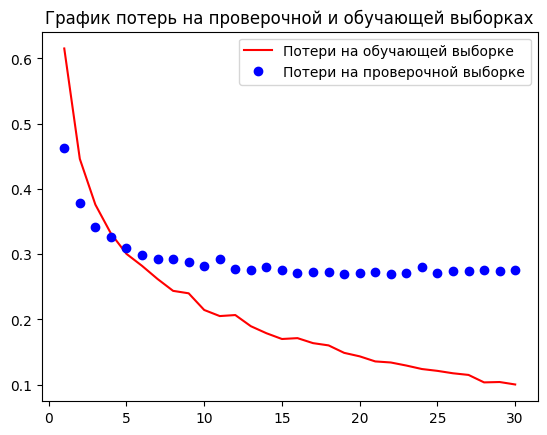

In [ ]:
show_history(history)

Мы достигли точности 89 %, что уже вполне хороший результат!

Однако видно по графикам, что проявляется эффект переобучения после 5-й эпохи, несмотря даже на выбор довольно большого коэффициента прореживания. Это объясняется тем, что данный прием не использует расширение данных (аугментацию), которое необходимо для предотвращения переобучения на небольших наборах изображений.

##### Выделение признаков с расширением данных

Теперь рассмотрим второй прием выделения признаков, более медленный и затратный, но позволяющий использовать аугментацию в процессе обучения.

Этот прием настолько затратный, что его следует применять только при наличии GPU — он абсолютно не под силу CPU. Если у вас нет возможности запустить свой код на GPU, первый путь остается для вас единственным доступным решением.

Поэтому незабудьте перевести свой Блокнот в режим GPU!

Так как модели действуют подобно слоям, вы можете добавить модель (такую, как `conv_base`) в модель `Sequential` как самый обычный слой.

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3)))
model.add(conv_base) # Это просто магия!!!
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Вот как теперь выглядит модель:

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

Мы видим, что сверточная основа `VGG16` имеет 14714688 параметров, что представляет собой достаточно большое число. Классификатор, добавленный сверху, имеет около 2 миллионов параметров.

Перед компиляцией и обучением модели очень важно заморозить сверточную основу. Замораживание одного или нескольких слоев предотвращает изменение весовых коэффициентов в них в процессе обучения. Если этого не сделать, тогда представления, прежде изученные сверточной основой, изменятся в процессе обучения на новых данных. Так как слои `Dense` сверху инициализируются случайными значениями, в сети могут произойти существенные изменения весов, фактически разрушив представления, полученные ранее.

В Keras, чтобы заморозить сеть, нужно передать атрибут `trainable` со значением False:

In [ ]:
print('Число обучаемых весов до заморозки:', len(model.trainable_weights))

# замораживаем веса модели
conv_base.trainable = False

print('Число обучаемых весов после заморозки:', len(model.trainable_weights))

Число обучаемых весов до заморозки: 30
Число обучаемых весов после заморозки: 4


В этом случае обучению будут подвергаться только веса из двух вновь добавленных слоев Dense, то есть всего четыре весовых тензора: по два на слой (главная весовая матрица и вектор смещений).

**ВАЖНО:** Чтобы изменения вступили в силу, необходимо скомпилировать модель. Если признак обучения весов изменяется после компиляции модели, необходимо снова перекомпилировать модель, иначе это изменение будет игнорироваться!!!


Теперь можно начинать обучение модели. Используем те же настройки расширения данных, как в предыдущем примере.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# генератор для обучающей выборки
train_datagen = ImageDataGenerator(
    rescale=1./255,           # нормализация данных
    rotation_range=40,        # поворот 40 градусов
    width_shift_range=0.2,    # смещенние изображения по горизонтали
    height_shift_range=0.2,   # смещенние изображения по вертикали
    shear_range=0.2,          # случайный сдвиг
    zoom_range=0.2,           # случайное масштабирование
    horizontal_flip=True,     # отражение по горизонтали
    fill_mode='nearest'       # стратегия заполнения пустых пикселей при трансформации
)
# генератор для проверочной выборки
test_datagen = ImageDataGenerator(rescale=1./255)

# генерация картинок из папки для обучающей выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# генерация картинок из папки для проверочной выборки
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# компиляция модели
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc']
)

# обучаем модель
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - acc: 0.6485 - loss: 0.6293 - val_acc: 0.7910 - val_loss: 0.4695
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 174ms/step - acc: 0.7854 - loss: 0.4932 - val_acc: 0.8540 - val_loss: 0.3741
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - acc: 0.8046 - loss: 0.4560 - val_acc: 0.8610 - val_loss: 0.3400
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - acc: 0.8130 - loss: 0.4117 - val_acc: 0.8600 - val_loss: 0.3241
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - acc: 0.8289 - loss: 0.3932 - val_acc: 0.8630 - val_loss: 0.3097
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - acc: 0.8328 - loss: 0.3827 - val_acc: 0.8680 - val_loss: 0.3033
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - acc: 0.8221 - loss: 0.3851 - val_acc: 0.8700 - val_loss: 0.2982
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - acc: 0.8482 - loss: 0.3642 - val_acc: 0.8720 - val_loss: 0.2915
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s

Снова построим графики изменения потерь и точности в процессе обучения:


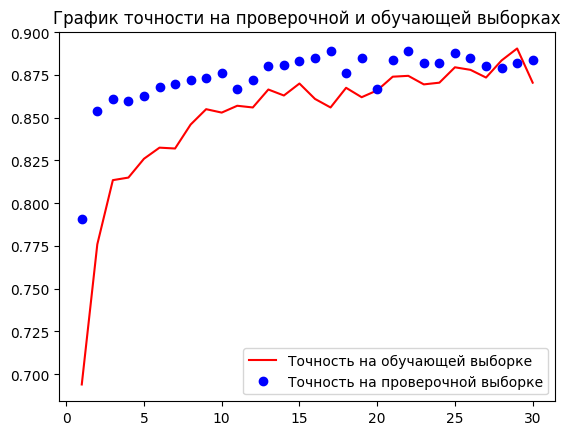

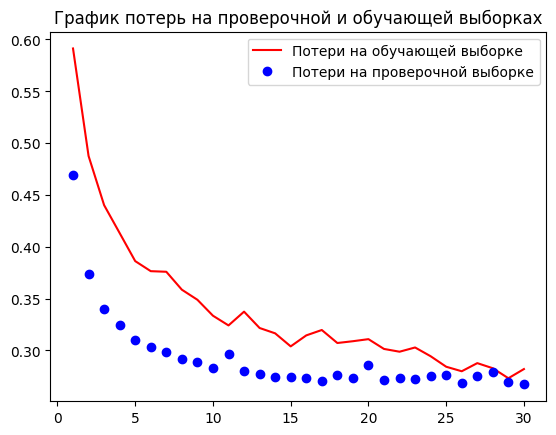

In [ ]:
show_history(history)

Как видите, мы достигли точности в 90% на этапе проверки. Этот результат намного лучше, чем в случае обучения небольшой сверточной нейронной сети с нуля. К тому же нет переобучения и всего 30 эпох прошло, можно продолжать обучение!

#### Тонкая настройка (Fine-Tuning)

Даже простой перенос обучения открывает перед нами широкие возможности.
Обычно, чтобы создать новую модель классификатора, достаточно добавить
два-три полносвязных слоя после универсальных слоев. Но если потребуется
более высокая точность, мы должны вовлечь в обучение больше слоев. Это
означает разморозку некоторых слоев, которые при простом переносе обучения
оставались бы в неприкосновенности. Этот прием называется тонкой настройкой. На рис. 3 показан пример, где некоторые сверточные, расположенные ближе к выходу сети размораживаются и обучаются для выполнения поставленной задачи.

Очевидно, что по сравнению с простым переносом обучения прием тонкой настройки вовлекает в обучение с нашим набором данных больше слоев. Поскольку
для решения задачи адаптируется большее количество слоев, чем при переносе
обучения, можно добиться большей точности. Решение о том, сколько слоев подвергнуть тонкой настройке, зависит от количества имеющихся данных, а также
от совместимости целевой задачи с исходным набором данных, на котором была
обучена исходная модель.

Мы часто слышим, как специалисты по обработке данных говорят: «Я провел тонкую настройку модели». Это означает, что они взяли предварительно обученную модель, удалили слои, предназначенные для конкретных задач, и добавили новые, заморозили нижние слои и обучили верхнюю часть сети на новом датасете.

В повседневной практике термины «перенос обучения» и «тонкая настройка» используются как взаимозаменяемые. При разговоре слова «перенос
обучения» используются больше для описания общей идеи, тогда как «тонкая настройка» — для описания способа ее реализации.

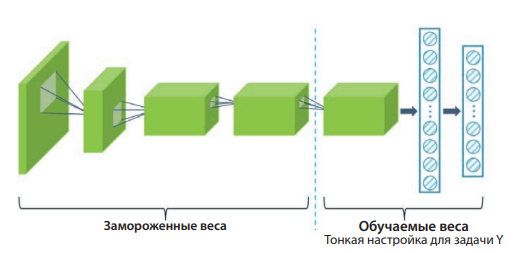

**Рис. 3. Схема тонкой настройки нейронной сети**

Когда вы дойдете до больших языковых моделей, то термин Fine-Tuning будет приследовать вас повсеместно.

Достаточно написать в поиске название интересующей вас предобученной модели в комбинации с термином Fine-Tuning и вы получите самую актуальную и полезную информацию об использовании модели в своих проектах.

В предыдущем примере мы замораживали сверточную основу сети `VGG16`, чтобы получить возможность обучить классификатор, инициализированный случайными значениями. По той же причине после обучения классификатора можно дообучить несколько верхних слоев сверточной основы.

Если классификатор еще не обучен, ошибочный сигнал, распространяющийся по сети в процессе дообучения, окажется слишком велик, и представления, полученные на предыдущем этапе обучения, будут разрушены.

**Алгоритм дообучения сети** включает следующие шаги:

1. Добавить свою сеть поверх обученной базовой сети.
2. Заморозить базовую сеть.
3. Обучить добавленную часть.
4. Разморозить несколько слоев в базовой сети.
5. Обучить эти слои и добавленную часть вместе.


Мы уже выполнили первые три шага в ходе выделения признаков. Теперь выполним шаг 4. Для этого разморозим `conv_base` и заморозим отдельные слои в ней.

Посмотрим, как выглядит наша сверточная основа:

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Можно на слои посмотреть с помощью утилиты plot_model:

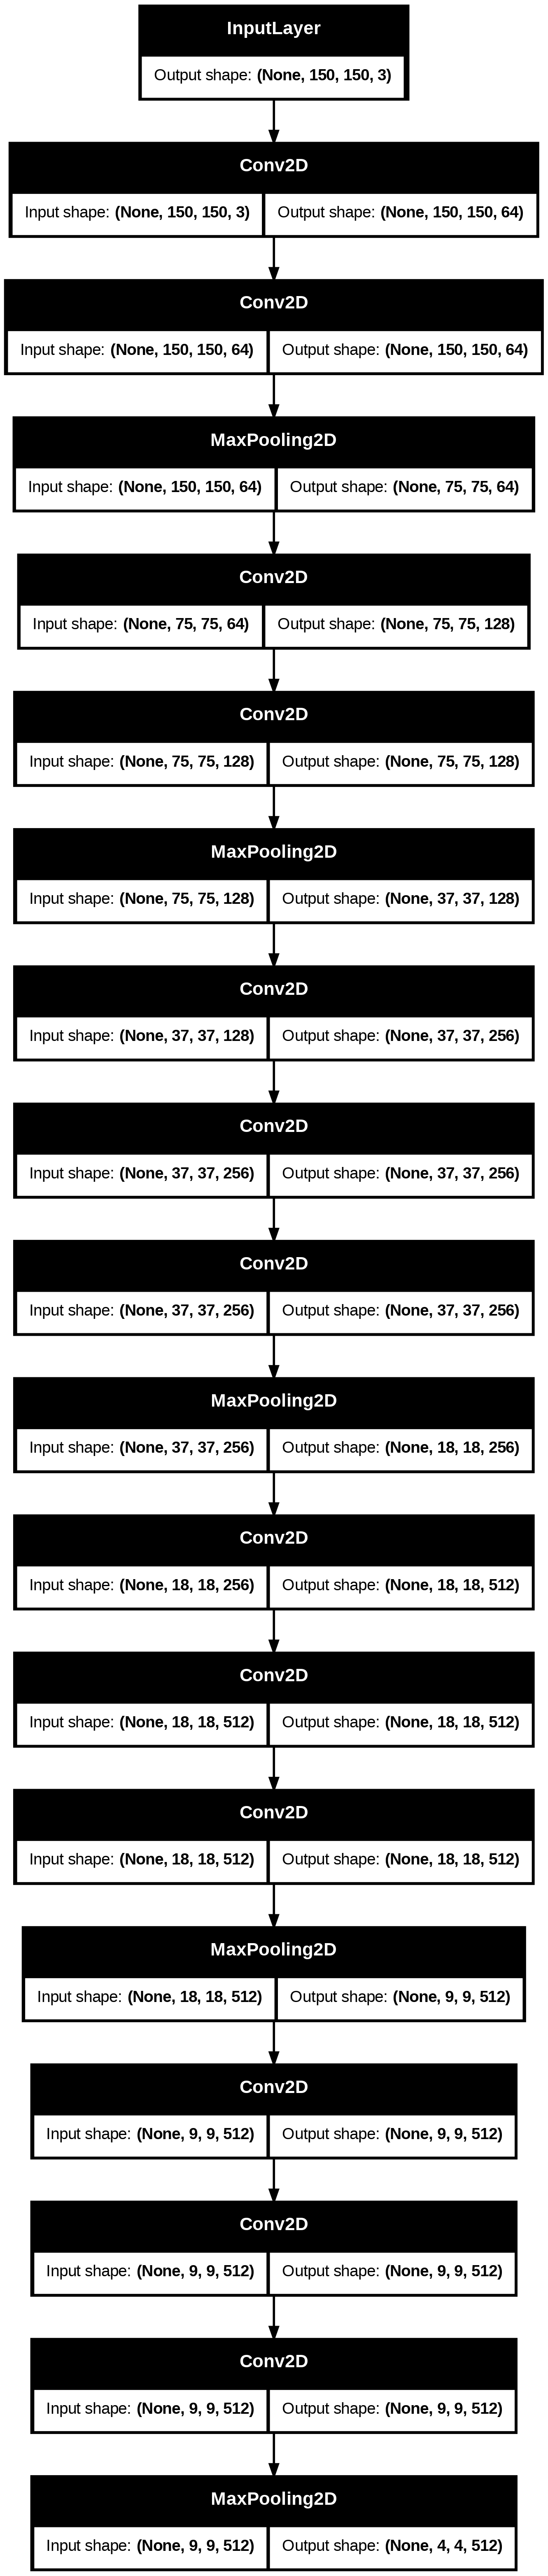

In [ ]:
from keras.utils import plot_model
plot_model(conv_base, show_shapes=True, to_file='model.png')

Мы дообучим три последних сверточных слоя, то есть все слои выше `block4_pool` нужно заморозить, а слои `block5_conv1`, `block5_conv2` и `block5_conv3` — сделать доступными для обучения.

**Почему бы не дообучить больше слоев? Почему бы не дообучить всю сверточную основу?**

Так можно поступить, но имейте в виду следующее:
* Начальные слои в сверточной основе кодируют более обобщенные признаки, пригодные для повторного использования, а более высокие слои кодируют более конкретные признаки. Намного полезнее донастроить более конкретные признаки, потому что именно их часто нужно перепрофилировать для решения новой задачи.
* Ценность дообучения верхних слоев быстро падает с их глубиной.
* Чем больше параметров обучается, тем выше риск переобучения.

Сверточная основа имеет 15 миллионов параметров, поэтому было бы слишком рискованно пытаться дообучить ее целиком на нашем небольшом наборе данных.

То есть в данной ситуации лучшей стратегией будет дообучить только верхние два-три слоя сверточной основы. Сделаем это, начав с того места, на котором мы остановились в предыдущем примере.

In [ ]:
conv_base.trainable = True # В начале все слои обучаемые
set_trainable = False      # Переменная обучения изначально False
for layer in conv_base.layers: # Перебираем слои предобученной модели
    if layer.name == 'block5_conv1':
        set_trainable = True # Обучаем слои, начиная с block5_conv1
    if set_trainable:
        layer.trainable = True # Обучаем слоем
    else:
        layer.trainable = False # Замораживаем слой

Теперь можно начинать дообучение сети. Для этого используем оптимизатор RMSProp с очень маленькой скоростью обучения. Причина использования низкой скорости обучения заключается в необходимости ограничить величину изменений, вносимых в представления трех дообучаемых слоев. Слишком большие изменения
могут повредить эти представления.

In [ ]:
# После заморозки и разморозки слоев модель необходимо скомпилировать, чтобы изменения применились

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    metrics=['acc']
)

# Обучаем модель
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - acc: 0.8755 - loss: 0.3019 - val_acc: 0.8900 - val_loss: 0.2574
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - acc: 0.8773 - loss: 0.2671 - val_acc: 0.8910 - val_loss: 0.2633
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - acc: 0.8936 - loss: 0.2387 - val_acc: 0.9020 - val_loss: 0.2634
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - acc: 0.9158 - loss: 0.1961 - val_acc: 0.8980 - val_loss: 0.2808
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - acc: 0.9012 - loss: 0.2131 - val_acc: 0.8960 - val_loss: 0.2685
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - acc: 0.9220 - loss: 0.1919 - val_acc: 0.9070 - val_loss: 0.2734
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - acc: 0.9320 - loss: 0.1624 - val_acc: 0.9030 - val_loss: 0.2490
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 180ms/step - acc: 0.9346 - loss: 0.1613 - val_acc: 0.9160 - val_loss: 0.2423
Epoch 9/100
100/100 ━━━━

Построим графики с результатами обучения, используя написанную нами функцию `show_history`:

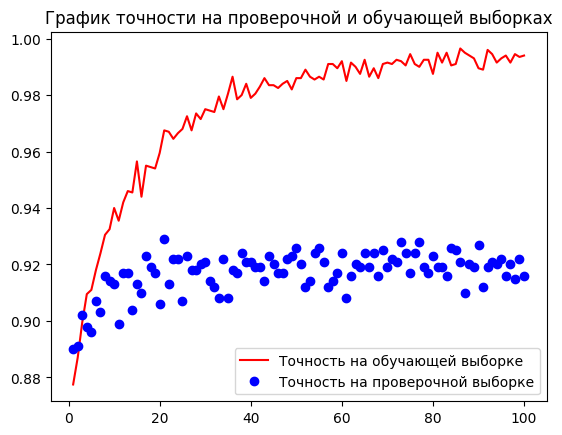

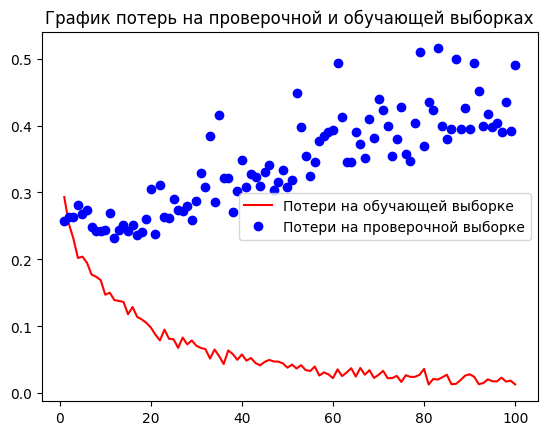

In [ ]:
show_history(history)

График имеет большой разброс и сложно по нему сделать предположение о точности модели, поэтому проведем процедуру сглаживания результатов:

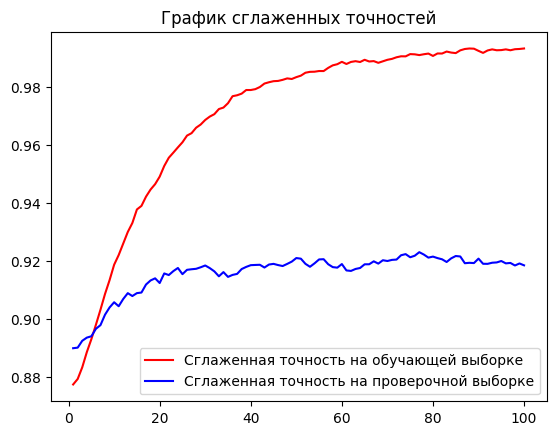

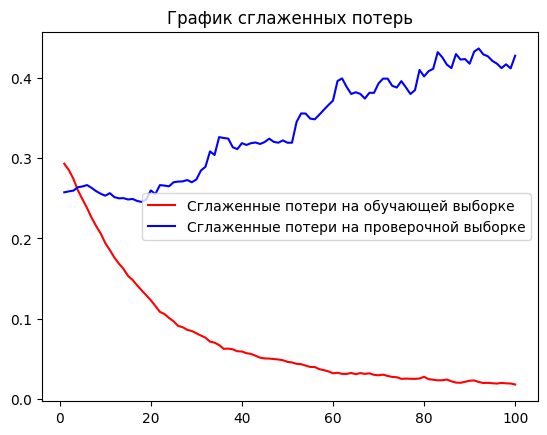

In [ ]:
# Функция сглаживания
def smooth_curve(
    points, # входные точки до сглаживания
    factor=0.8 # фактор сглаживания
    ):

    smoothed_points = [] # список из результирующих сглаженных точек
    for point in points:
        if smoothed_points:
            # В условие попадаем если уже в списке есть точки
            previous = smoothed_points[-1]
            # factor = 0.5 - это среднее значение между двумя точками
            # factor можно считать весом при усреднении
            # factor > 0.5 - берем значение ближе к предыдущей точке
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point) # Для первой точки
    return smoothed_points

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, smooth_curve(acc), 'r', label='Сглаженная точность на обучающей выборке')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Сглаженная точность на проверочной выборке')
plt.title('График сглаженных точностей')
plt.legend()
plt.figure()

plt.plot(epochs, smooth_curve(loss), 'r', label='Сглаженные потери на обучающей выборке')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Сглаженные потери на проверочной выборке')
plt.title('График сглаженных потерь')
plt.legend()
plt.show()

Теперь кривая точности на этапе проверки выглядит более гладкой. Мы видим, что точность на проверочной выборке составляет 92%.

Обратите внимание, что кривая потерь не показывает реального улучшения, наоборот, даже ухудшилась.

Как же так точность улучшилась, а потери даже выросли, соответственно, выросла и ошибка? Ответ прост: на графиках мы видим средние значения потерь по точкам. Однако для точности важно распределение значений потерь, а не их среднее, потому что точность есть результат определения бинарных порогов вероятности класса, предсказанного моделью. Модель может продолжать улучшаться, даже если это не отражается на среднем значении потерь.

Теперь наконец можно оценить модель на контрольных данных:

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Точность на контрольной выборке:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - acc: 0.9298 - loss: 0.3369
Точность на контрольной выборке: 0.925000011920929


Здесь мы получили точность почти 93%. Это очень хороший результат. Для примера, на этой модели, с теми же самыми гиперпараметрами, но на 20 тыс. исходных изображений, мы получили точность 97%.

Теперь попробуйте применить полученные знания и выполнить [домашнюю работу](https://colab.research.google.com/drive/18saeNkboTBS_5E9lxJ6xB4R0pawgxruY).